In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

df_listing =pd.read_csv('./data/listings.csv')
df_reviews = pd.read_csv('./data/reviews.csv')
df_calendar = pd.read_csv('./data/calendar.csv')

In [194]:
df_listing = df_listing.dropna(subset=["neighbourhood","amenities", "review_scores_rating", "price", "review_scores_value"])

In [195]:
# find null columns
df_listing.isnull().sum().sort_values(ascending=False)

jurisdiction_names              2360
neighbourhood_group_cleansed    2360
has_availability                2360
license                         2360
square_feet                     2309
                                ... 
longitude                          0
is_location_exact                  0
room_type                          0
accommodates                       0
reviews_per_month                  0
Length: 95, dtype: int64

In [196]:
# Provide a set of columns with more than 75% of the values missing
list(df_listing.columns[df_listing.isnull().mean() > 0.75])

['neighbourhood_group_cleansed',
 'square_feet',
 'has_availability',
 'license',
 'jurisdiction_names']

In [197]:
# remove null columns
df_listing.drop(columns=['neighbourhood_group_cleansed','jurisdiction_names','has_availability','license','square_feet'],inplace=True)

In [198]:
df_listing['price'] = df_listing['price'].replace('\$|,', '', regex=True)
df_listing['price'] = pd.to_numeric(df_listing['price'])
encoder = LabelEncoder()
df_listing['property_type']=encoder.fit_transform(df_listing['property_type'].astype('str'))
df_listing['room_type']=encoder.fit_transform(df_listing['room_type'].astype('str'))
df_listing['bed_type']=encoder.fit_transform(df_listing['bed_type'].astype('str'))
df_listing['neighbourhood']=encoder.fit_transform(df_listing['neighbourhood'].astype('str'))


In [199]:
df_listing=df_listing[['price','property_type','room_type','bed_type','neighbourhood']]

In [166]:
# Select the numerical features
num_df = df_listing.select_dtypes(include=['float64', 'int64'])
num_cols = list(df_listing.select_dtypes(include=['float64', 'int64']).columns)
num_df=num_df.dropna()

In [168]:
# select the categorical features
cat_df = df_listing.select_dtypes(include=['object'])

cat_df['price'] = cat_df['price'].replace('\$|,', '', regex=True)
cat_df['price'] = pd.to_numeric(cat_df['price'])
cat_df=cat_df[['price','property_type','room_type','bed_type','neighbourhood']]

In [169]:
encoder = LabelEncoder()
cat_df['property_type']=encoder.fit_transform(cat_df['property_type'].astype('str'))
cat_df['room_type']=encoder.fit_transform(cat_df['room_type'].astype('str'))
cat_df['bed_type']=encoder.fit_transform(cat_df['bed_type'].astype('str'))
cat_df['neighbourhood']=encoder.fit_transform(cat_df['neighbourhood'].astype('str'))
cat_df

,price,property_type,room_type,bed_type,neighbourhood
1,65.0,0,1,4,21
2,65.0,0,1,4,21
4,79.0,7,1,4,21
5,75.0,3,1,4,21
7,75.0,7,1,4,21
...,...,...,...,...,...
3573,65.0,0,1,4,23
3574,68.0,10,1,4,6
3575,69.0,0,1,4,23
3580,69.0,0,1,4,23


In [171]:
print("There are {} numerical features".format(len(num_df.columns)))
print("There are {} categorical features".format(len(cat_df.columns)))

There are 28 numerical features
There are 5 categorical features


Text(0, 0.5, 'price')

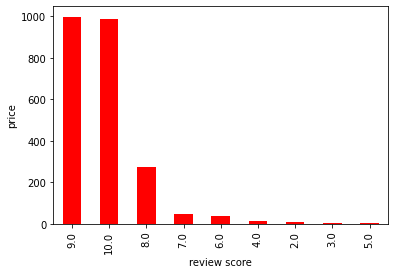

In [92]:
# Q1. What is the correlation between reveiws scores and prices?
df_listing.groupby('review_scores_value')['price'].count().sort_values(ascending=False).plot(kind='bar', color='red')
plt.xlabel('review score')
plt.ylabel('price')

Text(0, 0.5, 'price')

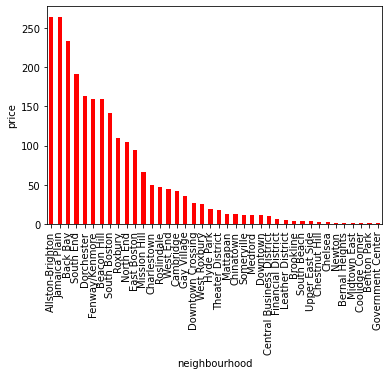

In [93]:
# Q2: What neighborhoods harber the best price for owners?
df_listing.groupby('host_neighbourhood')['price'].count().sort_values(ascending=False).plot(kind='bar', color='red')
plt.xlabel('neighbourhood')
plt.ylabel('price')

Text(0, 0.5, 'price')

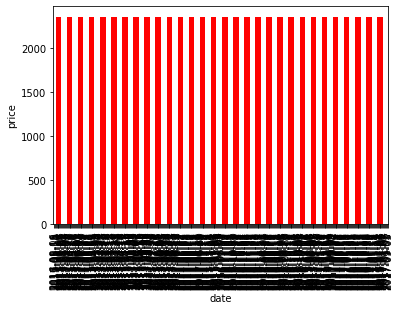

In [94]:
# Q3: What are the best seasons to increase price by owners?
result = pd.merge(df_listing,df_calendar,left_on=['id'],right_on = ['listing_id'])
result.groupby('date')['price_x'].count().sort_values(ascending=False).plot(kind='bar', color='red')
plt.xlabel('date')
plt.ylabel('price')


In [205]:
#Split into explanatory and response variables
X = df_listing.drop('price', axis=1)
y = df_listing['price']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)




In [206]:
#Print training and testing score
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 0.3040321049102459.  The rsquared on the test data was 0.3030322562137526.
